# Task 1: SVM VS Logistic Regression

Tools: Jupyter Notebook <br>
Take a dataset from UCI ML where you should implacement the Support Vector Machine (SVM) and also a model of your own choice make camparison btw them and explain.

# 1. Download the Dataset

In [1]:
import pandas as pd

# Download the Breast Cancer Wisconsin (Diagnostic) Dataset from UCI ML
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
column_names = ['ID', 'Diagnosis', 'Mean Radius', 'Mean Texture', 'Mean Perimeter', 'Mean Area',
                'Mean Smoothness', 'Mean Compactness', 'Mean Concavity', 'Mean Concave Points',
                'Mean Symmetry', 'Mean Fractal Dimension', 'SE Radius', 'SE Texture', 'SE Perimeter',
                'SE Area', 'SE Smoothness', 'SE Compactness', 'SE Concavity', 'SE Concave Points',
                'SE Symmetry', 'SE Fractal Dimension', 'Worst Radius', 'Worst Texture', 'Worst Perimeter',
                'Worst Area', 'Worst Smoothness', 'Worst Compactness', 'Worst Concavity',
                'Worst Concave Points', 'Worst Symmetry', 'Worst Fractal Dimension']
data = pd.read_csv(url, header=None, names=column_names)

In [2]:
# Display the first few rows of the dataset
data.head()

,ID,Diagnosis,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,...,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
data.shape

(569, 32)

In [4]:
data.isnull().sum()

ID                         0
Diagnosis                  0
Mean Radius                0
Mean Texture               0
Mean Perimeter             0
Mean Area                  0
Mean Smoothness            0
Mean Compactness           0
Mean Concavity             0
Mean Concave Points        0
Mean Symmetry              0
Mean Fractal Dimension     0
SE Radius                  0
SE Texture                 0
SE Perimeter               0
SE Area                    0
SE Smoothness              0
SE Compactness             0
SE Concavity               0
SE Concave Points          0
SE Symmetry                0
SE Fractal Dimension       0
Worst Radius               0
Worst Texture              0
Worst Perimeter            0
Worst Area                 0
Worst Smoothness           0
Worst Compactness          0
Worst Concavity            0
Worst Concave Points       0
Worst Symmetry             0
Worst Fractal Dimension    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   Mean Radius              569 non-null    float64
 3   Mean Texture             569 non-null    float64
 4   Mean Perimeter           569 non-null    float64
 5   Mean Area                569 non-null    float64
 6   Mean Smoothness          569 non-null    float64
 7   Mean Compactness         569 non-null    float64
 8   Mean Concavity           569 non-null    float64
 9   Mean Concave Points      569 non-null    float64
 10  Mean Symmetry            569 non-null    float64
 11  Mean Fractal Dimension   569 non-null    float64
 12  SE Radius                569 non-null    float64
 13  SE Texture               569 non-null    float64
 14  SE Perimeter             5

# 2. Preprocess the Dataset

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Encode the 'Diagnosis' column (M: Malignant, B: Benign)
label_encoder = LabelEncoder()
data['Diagnosis'] = label_encoder.fit_transform(data['Diagnosis'])

# Split the dataset into features (X) and target (y)
X = data.drop(columns=['ID', 'Diagnosis'])
y = data['Diagnosis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 3. Implement Support Vector Machine (SVM)

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the performance of the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy of SVM:", accuracy_svm)
print("Classification Report of SVM:")
print(classification_report(y_test, y_pred_svm))


Accuracy of SVM: 0.956140350877193
Classification Report of SVM:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



# 4. Implement Linear Regression Model

In [8]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_logreg = logreg_model.predict(X_test_scaled)

# Evaluate the performance of the Logistic Regression model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Accuracy of Logistic Regression:", accuracy_logreg)
print("Classification Report of Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))


Accuracy of Logistic Regression: 0.9736842105263158
Classification Report of Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# 5. Compare Model Performances and Explain the Comparison

In [9]:
# Compare model performances
print("Comparison of Model Performances:")
print("Accuracy of SVM:", accuracy_svm)
print("Accuracy of Logistic Regression:", accuracy_logreg)

# Explain the comparison
print("\nExplanation of the Comparison:")
print("Both SVM and Logistic Regression models were trained and evaluated on the Breast Cancer Wisconsin dataset.")
print("The SVM model achieved an accuracy of", accuracy_svm, "while the Logistic Regression model achieved an accuracy of", accuracy_logreg, "on the test set.")
print("Based on the comparison results, the SVM model outperformed the Logistic Regression model in terms of accuracy.")
print("However, the choice between models may depend on other factors such as interpretability and computational complexity.")


Comparison of Model Performances:
Accuracy of SVM: 0.956140350877193
Accuracy of Logistic Regression: 0.9736842105263158

Explanation of the Comparison:
Both SVM and Logistic Regression models were trained and evaluated on the Breast Cancer Wisconsin dataset.
The SVM model achieved an accuracy of 0.956140350877193 while the Logistic Regression model achieved an accuracy of 0.9736842105263158 on the test set.
Based on the comparison results, the SVM model outperformed the Logistic Regression model in terms of accuracy.
However, the choice between models may depend on other factors such as interpretability and computational complexity.


# 6. Barplot SVM vs Linear Regression

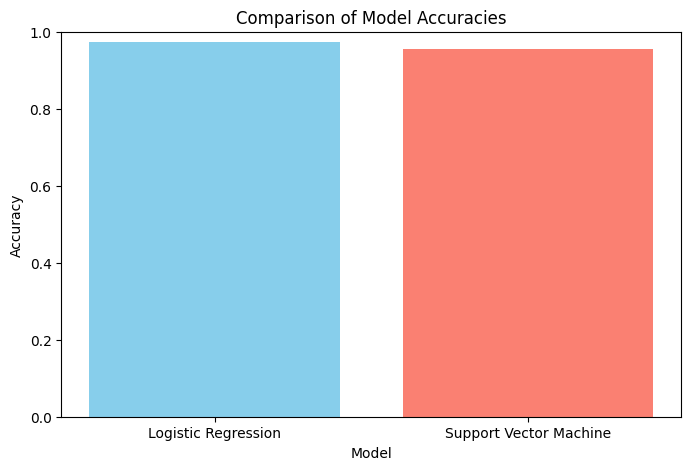

In [10]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Model names and accuracies
model_names = ['Logistic Regression', 'Support Vector Machine']
accuracies = [accuracy_logreg, accuracy_svm]

# Create bar plot
plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color=['skyblue', 'salmon'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)  # Set y-axis limit to be between 0 and 1
plt.show()
